# Titanic dataset

Goal: Determine parameters that determine survival or death of the passengers

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import math
from math import factorial
from scipy import stats
from scipy.stats import norm

titanic = pd.read_csv('train.csv')

### Data Preprocessing

In [2]:
titanic.shape

(891, 12)

In [3]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
titanic.set_axis(['passengerID','survived','class','name','sex','age','nrSibSp','nrParCh','ticket','fare','cabin','embarked'],axis='columns',inplace=True)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerID  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   class        891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   nrSibSp      891 non-null    int64  
 7   nrParCh      891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.duplicated().sum()

0

In [7]:
titanic.isnull().sum()

passengerID      0
survived         0
class            0
name             0
sex              0
age            177
nrSibSp          0
nrParCh          0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [8]:
titanic.sex.unique()

array(['male', 'female'], dtype=object)

In [9]:
titanic['class'].value_counts()

3    491
1    216
2    184
Name: class, dtype: int64

In [10]:
titanic.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [11]:
titanic[titanic['embarked'].isnull()]

,passengerID,survived,class,name,sex,age,nrSibSp,nrParCh,ticket,fare,cabin,embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [12]:
titanic.dropna(subset=['embarked'],inplace=True)
titanic.reset_index(drop=True,inplace=True)

In [13]:
titanic.cabin.fillna('--', inplace=True)

In [14]:
titanic['letter']=titanic.cabin.apply(lambda x: x.split()[0][0])

In [15]:
titanic.letter.value_counts()

-    687
C     59
B     45
D     33
E     32
A     15
F     13
G      4
T      1
Name: letter, dtype: int64

In [16]:
titanic['number']=titanic.cabin.apply(lambda x: x.split()[0][1:])

In [17]:
titanic.number.unique()

array(['-', '85', '123', '46', '6', '103', '56', '23', '78', '33', '30',
       '52', '83', '', '31', '5', '10', '26', '110', '58', '101', '47',
       '86', '2', '19', '7', '49', '4', '32', '80', '36', '15', '93',
       '35', '87', '77', '67', '94', '125', '99', '118', '22', '106',
       '65', '54', '57', '34', '18', '124', '91', '40', '128', '37', '50',
       '82', '96', '44', '104', '111', '92', '38', '21', '12', '63', '14',
       '20', '79', '25', '73', '95', '39', '70', '16', '68', '41', '9',
       '48', '126', '71', '51', '62', '24', '90', '45', '8', '121', '11',
       '3', '17', '102', '69', '28', '42', '148'], dtype=object)

In [18]:
titanic.pivot_table(index='letter',columns='class',values='survived',aggfunc='count')

class,1,2,3
letter,,,
-,40.0,168.0,479.0
A,15.0,NaN,NaN
B,45.0,NaN,NaN
C,59.0,NaN,NaN
D,29.0,4.0,NaN
E,25.0,4.0,3.0
F,NaN,8.0,5.0
G,NaN,NaN,4.0
T,1.0,NaN,NaN


In [19]:
def class_cabin(c):
    if c==1:
        return 'C'+str(random.randint(1, 149))
    elif c==2:
        return 'D'+str(random.randint(1, 149))
    elif c==3:
        return 'F'+str(random.randint(1, 149))

titanic['random_cabin']=titanic['class'].apply(class_cabin)

In [20]:
titanic.cabin=np.where(titanic.cabin=='--',titanic.random_cabin,titanic.cabin)

In [21]:
titanic.head(3)

,passengerID,survived,class,name,sex,age,nrSibSp,nrParCh,ticket,fare,cabin,embarked,letter,number,random_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,F98,S,-,-,F98
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85,C57
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,F109,S,-,-,F109


In [22]:
titanic.drop(['letter','number','random_cabin'],axis=1,inplace=True)

In [23]:
titanic.age.describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [24]:
titanic[titanic.nrSibSp>2]['age'].mean()

9.857142857142858

In [25]:
titanic[titanic.nrParCh>2]['age'].mean()

38.86666666666667

In [26]:
titanic[(titanic.nrSibSp==0) & (titanic.nrParCh==0)]['age'].mean()

32.1318407960199

In [27]:
def group_family(i):
    if i['nrSibSp']>2:
        return  titanic[titanic.nrSibSp>2]['age'].mean()
    elif i['nrParCh']>2:
        return titanic[titanic.nrParCh>2]['age'].mean()
    elif i['nrSibSp']==2:
        return  titanic[titanic.nrSibSp==2]['age'].mean()
    elif i['nrParCh']==2:
        return titanic[titanic.nrParCh==2]['age'].mean()
    elif i['nrSibSp']==1:
        return  titanic[titanic.nrSibSp==1]['age'].mean()
    elif i['nrParCh']==1:
        return titanic[titanic.nrParCh==1]['age'].mean()
    else:
        return titanic[(titanic.nrSibSp==0) & (titanic.nrParCh==0)]['age'].mean()
    
titanic['year_pred']=titanic.apply(group_family,axis=1)

In [28]:
titanic.year_pred.value_counts()

32.131841    535
30.089727    180
17.216912     48
9.857143      46
24.422000     38
22.620000     27
38.866667     15
Name: year_pred, dtype: int64

In [29]:
titanic.age.fillna(round(titanic.year_pred,1), inplace=True)

In [30]:
titanic = titanic.drop('year_pred',axis=1)

In [31]:
titanic

,passengerID,survived,class,name,sex,age,nrSibSp,nrParCh,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,F98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,F109,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,F89,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,D139,S
885,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,17.2,1,2,W./C. 6607,23.4500,F55,S
887,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [32]:
titanic.sex = titanic.sex.replace('male',0)

In [33]:
titanic.sex = titanic.sex.replace('female',1)

In [34]:
titanic.sex.value_counts()

0    577
1    312
Name: sex, dtype: int64

### Exploratory Data Analysis

In [35]:
def plot_hist(df,col):
    df.hist(column=col, figsize=(7,1.5), bins=25)
for c in ['survived','class','sex','age','nrSibSp','nrParCh','fare']:
    plot_hist(titanic,c)

In [36]:
titanic.pivot_table(index=['sex','class'],values='survived')

survived
sex class          
0   1      0.368852
    2      0.157407
    3      0.135447
1   1      0.967391
    2      0.921053
    3      0.500000

In [37]:
titanic.groupby('survived')[['class','sex','age','nrSibSp','nrParCh','fare']].mean()

,class,sex,age,nrSibSp,nrParCh,fare
survived,,,,,,
0,2.531876,0.147541,30.358288,0.553734,0.329690,22.117887
1,1.955882,0.679412,28.580206,0.476471,0.467647,48.209498


In [38]:
plt.figure(figsize=(12,7))
sns.heatmap(titanic.corr(), annot=True,cmap='Blues',linewidth=2);

In [39]:
titanic.query('age<21').pivot_table(index='age',values='survived',aggfunc='median').plot(figsize=(12,2));

In [40]:
ParSib = titanic.pivot_table(index=['nrSibSp','nrParCh'],values='survived',aggfunc=['count','mean'])
ParSib.columns=['count_survival','mean_survival']
ParSib_filtered = ParSib.query('count_survival > 8')
ParSib_filtered

count_survival  mean_survival
nrSibSp nrParCh                               
0       0                   535       0.300935
        1                    38       0.657895
        2                    29       0.724138
1       0                   123       0.520325
        1                    57       0.596491
        2                    19       0.631579
2       0                    16       0.250000
4       1                     9       0.000000
        2                     9       0.333333

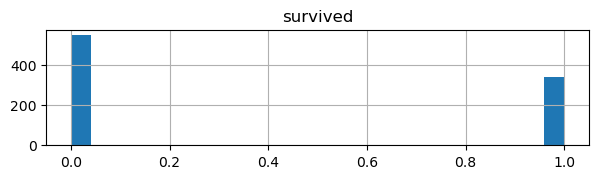

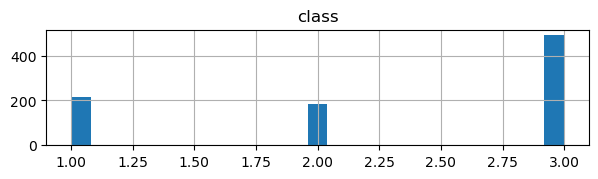

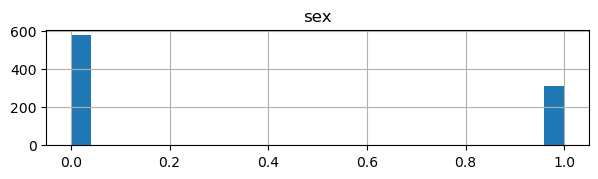

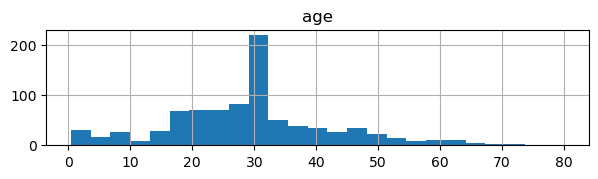

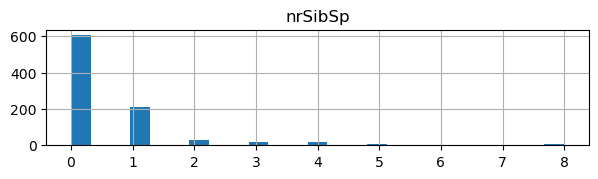

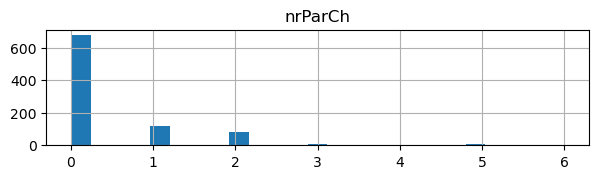

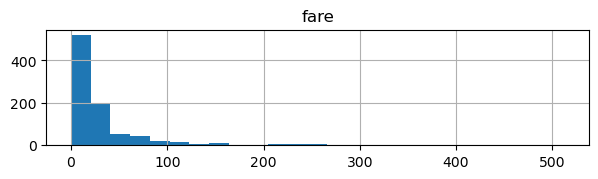

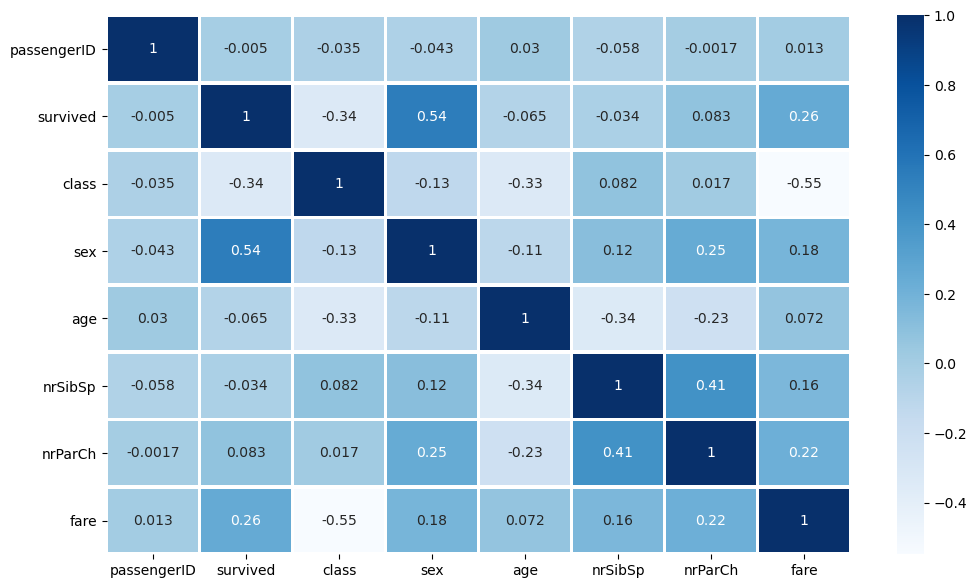

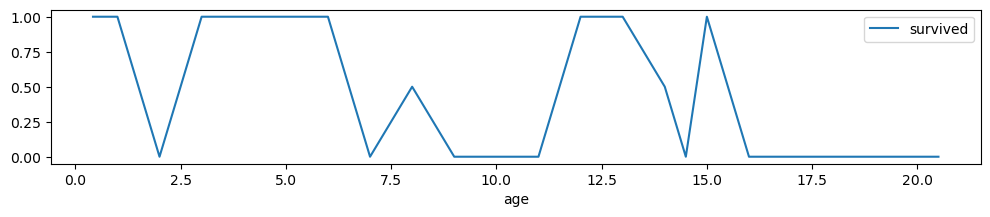

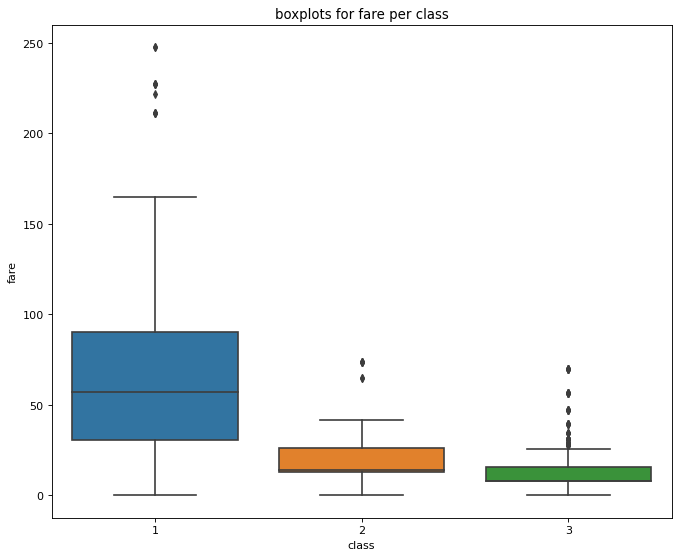

In [41]:
plt.figure(figsize=(10,8), dpi= 80)
sns.boxplot(x='class', y='fare', data=titanic.query('fare<250'), notch=False)
plt.title('boxplots for fare per class')
plt.show();

In [42]:
x = np.array(titanic.sex).reshape((-1, 1))
y = np.array(titanic.survived)

lin_regr = LinearRegression().fit(x, y)

print('intercept:', lin_regr.intercept_)
print('slope:', lin_regr.coef_)
print('')
print('R^2:', lin_regr.score(x, y))

intercept: 0.18890814558058935
slope: [0.55147647]

R^2: 0.29331422075256564


In [43]:
x = titanic[['class','sex','age','nrSibSp','nrParCh','fare']]
y = titanic['survived']

multi_regr = LinearRegression().fit(x,y)

print('intercept:',multi_regr.intercept_)
print('slope:',multi_regr.coef_)
print('')
print('R^2:', multi_regr.score(x, y))

intercept: 0.7856436223469216
slope: [-1.69086782e-01  5.10434873e-01 -5.75611974e-03 -5.03975152e-02
 -2.01833969e-02  4.20459280e-04]

R^2: 0.39119309485199194


### Statistical Data Analysis

In [44]:
nr_male = titanic[titanic['sex']==0].count()[0]
nr_female = titanic[titanic['sex']==1].count()[0]
prop_male_survival = round(titanic[(titanic['sex']==0) & (titanic['survived']==1)].count()[0] / titanic[titanic['sex']==0].count()[0],2)
prop_female_survival = round(titanic[(titanic['sex']==1) & (titanic['survived']==1)].count()[0] / titanic[titanic['sex']==0].count()[0],2)

In [45]:
print('number of titanic passenger being male:',nr_male)
print('number of titanic passenger being female:',nr_female)
print('probability for a titanic passenger being male and surviving:',prop_male_survival)
print('probability for a titanic passenger being female and surviving:',prop_female_survival)

number of titanic passenger being male: 577
number of titanic passenger being female: 312
probability for a titanic passenger being male and surviving: 0.19
probability for a titanic passenger being female and surviving: 0.4


binominal vs normal distribution for gender and survival

In [47]:
# binominal distribution

distr_m_survived = []

for k in range(0,nr_male+1):
    n_over_k = factorial(nr_male)/(factorial(nr_male-k)*factorial(k))
    p_k = n_over_k*prop_male_survival**k*(1-prop_male_survival)**(nr_male-k)
    distr_m_survived.append(p_k)
    
plt.bar(range(0,nr_male+1),distr_m_survived);

# normal distribution

mu_m = nr_male * prop_male_survival
sigma_m = math.sqrt(mu_m*(1-prop_male_survival))

norm_m_survived = norm.pdf(range(0,nr_male+1),mu_m,sigma_m)

plt.plot(range(0,nr_male+1),norm_m_survived, 'r-');

In [49]:
# binominal distribution

distr_f_survived = []

for k in range(0,nr_female+1):
    n_over_k = factorial(nr_female)/(factorial(nr_female-k)*factorial(k))
    p_k = n_over_k*prop_female_survival**k*(1-prop_female_survival)**(nr_female-k)
    distr_f_survived.append(p_k)
    
plt.bar(range(0,nr_female+1),distr_f_survived);

# normal distribution

mu_f = nr_female * prop_female_survival
sigma_f = math.sqrt(mu_f*(1-prop_female_survival))

norm_f_survived = norm.pdf(range(0,nr_female+1),mu_f,sigma_f)

plt.plot(range(0,nr_female+1),norm_f_survived, 'r-');

In [50]:
# probability of having at least 120 female survivors

stats.norm(mu_f,sigma_f).cdf(120)

0.289549870976959

In [51]:
# probability of having more than 100 male survivors

1-stats.norm(mu_m,sigma_m).cdf(100)

0.846591826631863

In [52]:
# 80% probability of having less female survivors than that

stats.norm(mu_f,sigma_f).ppf(0.8)

132.08282042919936

In [53]:
# 95% probability of having at least as many male survivors

stats.norm(mu_m,sigma_m).ppf(1-0.95)

94.12990095558389

one and two-sided t-test for fare class and survival

In [54]:
titanic.pivot_table(index='class', values='survived', aggfunc=['count','mean','median','var','std'])

,count,mean,median,var,std
,survived,survived,survived,survived,survived
class,,,,,
1,214,0.626168,1,0.235181,0.484954
2,184,0.472826,0,0.250624,0.500623
3,491,0.242363,0,0.183998,0.428949


In [56]:
# On average every second passenger in 2. class survived

class_two_survivors = titanic[titanic['class']==2]['survived']

avg_ninety = 0.5
alpha = 0.01

two_sided = stats.ttest_1samp(class_two_survivors,avg_ninety)

print(two_sided.pvalue)

if two_sided.pvalue < alpha:
    print('reject H0')
else:
    print('H0 cannot be rejected')

0.4624958172882164
H0 cannot be rejected


In [58]:
# On average every second passenger in 3. class survived

class_three_survivors = titanic[titanic['class']==3]['survived']

avg_ninety = 0.5
alpha = 0.01

two_sided = stats.ttest_1samp(class_three_survivors,avg_ninety)

print(two_sided.pvalue)

if two_sided.pvalue < alpha:
    print('reject H0')
else:
    print('H0 cannot be rejected')

1.020857949034733e-34
reject H0


In [59]:
# On average every second passenger in 2. class or more survived

class_two_survivors = titanic[titanic['class']==2]['survived']

avg = 0.5
alpha = 0.05

two_sided = stats.ttest_1samp(class_two_survivors,avg)

print(two_sided.pvalue/2)

if (two_sided.pvalue/2 < alpha) and (class_two_survivors.mean() > avg):
    print('reject H0')
else:
    print('H0 cannot be rejected')

0.2312479086441082
H0 cannot be rejected


In [60]:
# On average every second passenger in 1. class or more survived

class_one_survivors = titanic[titanic['class']==1]['survived']

avg = 0.5
alpha = 0.05

two_sided = stats.ttest_1samp(class_one_survivors,avg)

print(two_sided.pvalue/2)

if (two_sided.pvalue/2 < alpha) and (class_one_survivors.mean() > avg):
    print('reject H0')
else:
    print('H0 cannot be rejected')

9.234074109965183e-05
reject H0
